# Circular Bump Function

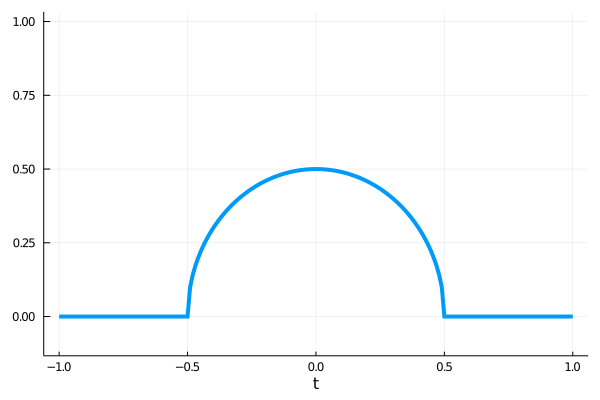

In [1]:
using Plots

t = collect(-1:0.01:1)
cb(t) = abs(t)<1/2 ? sqrt.(0.25 .- t.^2) : 0
p = plot(t,cb.(t), xlim=[-1,1], ylim=[-0.1,1], label=:false, linewidth=4, xlabel="t")

# Fourier transform 

Considering that the signal is read and even:

$$
\begin{align}
y(t) &= \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \frac{cos(n\pi t)}{L} \\
\end{align}
$$

The following integral is derived with Mathematica online calculator.

$$
\begin{align}
a(0) &= \int_{-L}^{+L} y(t) dt  \\
&= \int_{-0.5}^{+0.5} \sqrt{\frac{1}{4}-t^2} dt \\
&= 0.392699
\end{align}
$$

And, 

$$
\begin{align}
a(n) &= \frac{1}{L} \int_{-L}^{+L} y(t) cos(\frac{n \pi t}{L}) dt  \\
&= \int_{-0.5}^{+0.5} \sqrt{\frac{1}{4}-t^2} cos(n \pi t) dt \\
&= \frac{J_1(\frac{n\pi}{2})}{2n}
\end{align}
$$



## M program

In [2]:
using SpecialFunctions

function Mp(m, t)
    a0 = 0.392699
    y = (a0/2)*ones(size(t))
    for n=1:m
        an = besselj(1, n*π/2)/(2*n)
        y += an*cos.(n*π*t)  
    end
    y
end 

Mp (generic function with 1 method)

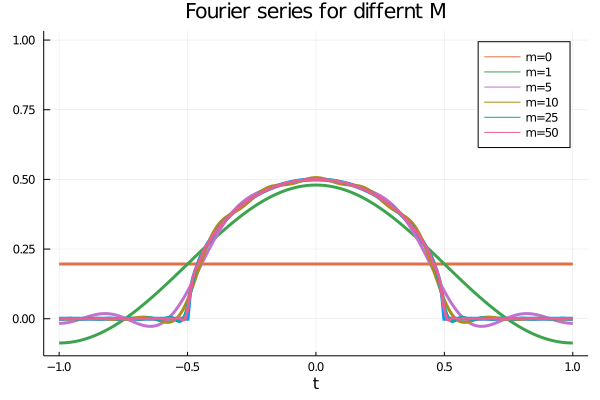

In [3]:
m = [0, 1, 5, 10, 25, 50]

for k in m
    y = Mp(k, t)
    p = plot!(p, t,y, linewidth=3, label="m="*string(k), title="Fourier series for differnt M")
end

display(p)

## RMS error

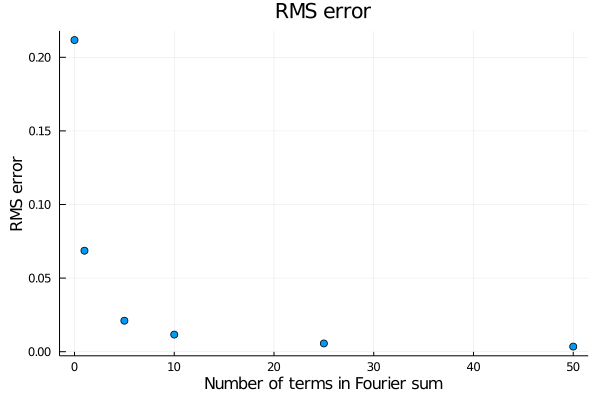

In [4]:
function err(m)
    t = collect(-1:0.01:1)
    sqrt(sum((Mp(m, t)-cb.(t)).^2)/size(t,1))
end

plot(m,err.(m), seriestype=:scatter, xlabel="Number of terms in Fourier sum"
    , ylabel="RMS error", title="RMS error", label=:false)

## Adjourn

In [5]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/4 16:53"